In [1]:
import pandas as pd
dict_={'a':[11,21,31],'b':[12,22,32]} #construim un dictionar
df=pd.DataFrame(dict_)

In [2]:
print(df.head())
print(df.mean())# calculeaza media

    a   b
0  11  12
1  21  22
2  31  32
a    21.0
b    22.0
dtype: float64


In [10]:
from nba_api.stats.static import teams #https://pypi.org/project/nbaapi/
import matplotlib.pyplot as plt
nba_teams = teams.get_teams() # preia echipele
print(nba_teams[0:3])


[{'id': 1610612737, 'full_name': 'Atlanta Hawks', 'abbreviation': 'ATL', 'nickname': 'Hawks', 'city': 'Atlanta', 'state': 'Atlanta', 'year_founded': 1949}, {'id': 1610612738, 'full_name': 'Boston Celtics', 'abbreviation': 'BOS', 'nickname': 'Celtics', 'city': 'Boston', 'state': 'Massachusetts', 'year_founded': 1946}, {'id': 1610612739, 'full_name': 'Cleveland Cavaliers', 'abbreviation': 'CLE', 'nickname': 'Cavaliers', 'city': 'Cleveland', 'state': 'Ohio', 'year_founded': 1970}]


In [12]:
def one_dict(list_dict):
 keys=list_dict[0].keys()
 out_dict={key:[] for key in keys}
 for dict_ in list_dict:
    for key, value in dict_.items():
        out_dict[key].append(value)
 return out_dict 

In [13]:
dict_nba_team=one_dict(nba_teams)
df_teams=pd.DataFrame(dict_nba_team)
print(df_teams.head())

           id             full_name abbreviation   nickname         city  \
0  1610612737         Atlanta Hawks          ATL      Hawks      Atlanta   
1  1610612738        Boston Celtics          BOS    Celtics       Boston   
2  1610612739   Cleveland Cavaliers          CLE  Cavaliers    Cleveland   
3  1610612740  New Orleans Pelicans          NOP   Pelicans  New Orleans   
4  1610612741         Chicago Bulls          CHI      Bulls      Chicago   

           state  year_founded  
0        Atlanta          1949  
1  Massachusetts          1946  
2           Ohio          1970  
3      Louisiana          2002  
4       Illinois          1966  


In [14]:
df_warriors=df_teams[df_teams['nickname']=='Warriors']
print(df_warriors)
id_warriors=df_warriors[['id']].values[0][0]
print(id_warriors)

           id              full_name abbreviation  nickname          city  \
7  1610612744  Golden State Warriors          GSW  Warriors  Golden State   

        state  year_founded  
7  California          1946  
1610612744


In [16]:
from nba_api.stats.endpoints import leaguegamefinder
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_warriors)


In [17]:
games = gamefinder.get_data_frames()[0]
print(games.head())


  SEASON_ID     TEAM_ID TEAM_ABBREVIATION              TEAM_NAME     GAME_ID  \
0     22022  1610612744               GSW  Golden State Warriors  0022200205   
1     22022  1610612744               GSW  Golden State Warriors  0022200197   
2     22022  1610612744               GSW  Golden State Warriors  0022200182   
3     22022  1610612744               GSW  Golden State Warriors  0022200156   
4     22022  1610612744               GSW  Golden State Warriors  0022200128   

    GAME_DATE      MATCHUP WL  MIN  PTS  ...  FT_PCT  OREB  DREB   REB  AST  \
0  2022-11-14  GSW vs. SAS  W  239  132  ...   0.938   5.0  35.0  40.0   35   
1  2022-11-13    GSW @ SAC  L  238  115  ...   0.938   8.0  35.0  43.0   27   
2  2022-11-11  GSW vs. CLE  W  240  106  ...   0.786   8.0  36.0  44.0   29   
3  2022-11-07  GSW vs. SAC  W  241  116  ...   0.667   8.0  40.0  48.0   28   
4  2022-11-04    GSW @ NOP  L  241  105  ...   0.920   3.0  26.0  29.0   23   

   STL  BLK  TOV  PF  PLUS_MINUS  
0    9   

In [18]:
games_home=games [games ['MATCHUP']=='GSW vs. TOR'] #meciuri acasa
games_away=games [games ['MATCHUP']=='GSW @ TOR'] #meciuri in deplasar

In [19]:
print(games_home)

     SEASON_ID     TEAM_ID TEAM_ABBREVIATION              TEAM_NAME  \
114      22021  1610612744               GSW  Golden State Warriors   
139      22021  1610612744               GSW  Golden State Warriors   
207      22020  1610612744               GSW  Golden State Warriors   
222      22019  1610612744               GSW  Golden State Warriors   
293      22019  1610612744               GSW  Golden State Warriors   
298      42018  1610612744               GSW  Golden State Warriors   
300      42018  1610612744               GSW  Golden State Warriors   
301      42018  1610612744               GSW  Golden State Warriors   
373      22018  1610612744               GSW  Golden State Warriors   
513      22017  1610612744               GSW  Golden State Warriors   
594      22016  1610612744               GSW  Golden State Warriors   
734      22015  1610612744               GSW  Golden State Warriors   
752      12015  1610612744               GSW  Golden State Warriors   
831   

In [20]:
print(games_away)

     SEASON_ID     TEAM_ID TEAM_ABBREVIATION              TEAM_NAME  \
101      22021  1610612744               GSW  Golden State Warriors   
168      22020  1610612744               GSW  Golden State Warriors   
299      42018  1610612744               GSW  Golden State Warriors   
302      42018  1610612744               GSW  Golden State Warriors   
303      42018  1610612744               GSW  Golden State Warriors   
379      22018  1610612744               GSW  Golden State Warriors   
474      22017  1610612744               GSW  Golden State Warriors   
616      22016  1610612744               GSW  Golden State Warriors   
633      12016  1610612744               GSW  Golden State Warriors   
635      22016  1610612744               GSW  Golden State Warriors   
725      22015  1610612744               GSW  Golden State Warriors   
806      22014  1610612744               GSW  Golden State Warriors   
904      22013  1610612744               GSW  Golden State Warriors   
1028  

In [21]:
games_home.mean()['PLUS_MINUS']
games_away.mean()['PLUS_MINUS']

C:\Users\uifal\AppData\Local\Temp\ipykernel_9856\1405800982.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  games_home.mean()['PLUS_MINUS']
C:\Users\uifal\AppData\Local\Temp\ipykernel_9856\1405800982.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  games_away.mean()['PLUS_MINUS']


-2.966666666666667

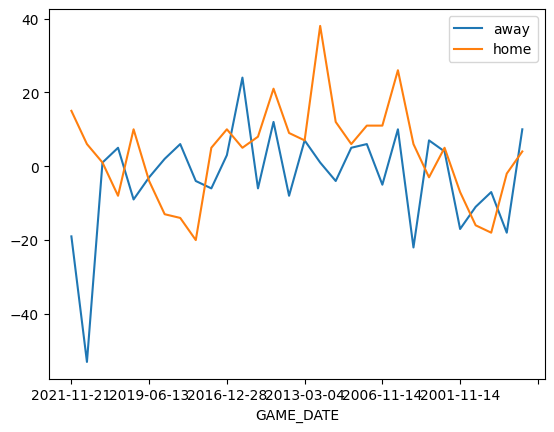

In [22]:
fig, ax = plt.subplots()
games_away.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()